loading the dataset(kaggle)

In [3]:
import pandas as pd

#load original dataset
df = pd.read_csv("../data/fake_job_postings.csv")

#preview
print("Original dataset shape:", df.shape)
df.head()

Original dataset shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


adding ai-generated 30 realistic scams

In [6]:
modern_fake_jobs = [
    {
        'title': "Remote Data Entry Operator",
        'location': "Remote",
        'department': "Operations",
        'description': "Earn ₹40,000/month from home. Just type PDF to Word. No experience needed.",
        'requirements': "Laptop or phone. ₹399 registration fee. No interviews required.",
        'fraudulent': 1
    },
    {
        'title': "Instagram Brand Collaborator",
        'location': "Mumbai, India",
        'department': "Marketing",
        'description': "Get ₹2,000/post by promoting our fashion products on Instagram.",
        'requirements': "Public Instagram. ₹699 onboarding kit. Must tag 3 pages to start.",
        'fraudulent': 1
    },
    {
        'title': "Crypto Investment Trainee",
        'location': "Bangalore",
        'department': "Finance",
        'description': "Learn crypto trading. Double your investment in 15 days. Mentorship provided.",
        'requirements': "₹1,000 investment. Join Telegram group. No formalities.",
        'fraudulent': 1
    },
    {
        'title': "WhatsApp Survey Responder",
        'location': "Remote",
        'department': "Support",
        'description': "Fill 100+ surveys daily on WhatsApp. Earn ₹25 per form. Paid every evening.",
        'requirements': "Pay ₹299 activation. Aadhar & UPI needed. Task login shared post-payment.",
        'fraudulent': 1
    },
    {
        'title': "Work-from-Home YouTube Commenter",
        'location': "Remote",
        'department': "Content",
        'description': "Get ₹10/comment on trending videos. Daily payout guaranteed.",
        'requirements': "Complete paid trial of ₹250 for account setup. No interview.",
        'fraudulent': 1
    },
    {
        'title': "Online Internship - Marketing Executive",
        'location': "Delhi",
        'department': "Marketing",
        'description': "Virtual internship with offer letter. Great for freshers and students.",
        'requirements': "₹599 internship fee. No interview. Offer letter on payment.",
        'fraudulent': 1
    },
    {
        'title': "Telegram Influencer Program",
        'location': "Online",
        'department': "Branding",
        'description': "Earn ₹1,000 daily sharing content via Telegram. Weekly bonuses.",
        'requirements': "Pay ₹499 toolkit fee. Referral mandatory. Telegram ID needed.",
        'fraudulent': 1
    },
    {
        'title': "Freelance Captcha Solver",
        'location': "Remote",
        'department': "Tech",
        'description': "Earn ₹5,000/week solving captchas. Unlimited work available.",
        'requirements': "₹300 deposit required. Task ID shared via WhatsApp.",
        'fraudulent': 1
    },
    {
        'title': "Amazon Package Receiver",
        'location': "Hyderabad",
        'department': "Logistics",
        'description': "Receive packages and forward them. ₹2,000 per package shipped.",
        'requirements': "Provide home address. ₹500 refundable verification fee.",
        'fraudulent': 1
    },
    {
        'title': "Work-from-Home Typist",
        'location': "Remote",
        'department': "Admin",
        'description': "Simple form filling from PDF. No interview. Start immediately.",
        'requirements': "₹499 software charge. Training included. Start today.",
        'fraudulent': 1
    },
    {
        'title': "ML Intern – Certificate Provided",
        'location': "Chennai",
        'department': "AI Research",
        'description': "Work on exciting ML projects remotely. Earn a completion certificate.",
        'requirements': "₹799 internship processing fee. No coding test. Quick onboarding.",
        'fraudulent': 1
    },
    {
        'title': "Quick Loan Processing Officer",
        'location': "Pune",
        'department': "Finance",
        'description': "Help customers with instant loan approvals. ₹25,000 fixed pay.",
        'requirements': "Submit ₹499 for onboarding. No job history required.",
        'fraudulent': 1
    },
    {
        'title': "Remote Review Writer",
        'location': "Anywhere in India",
        'department': "Content",
        'description': "Write fake reviews for Amazon & Google. ₹50 per review.",
        'requirements': "₹299 login setup. Mobile required. No approval needed.",
        'fraudulent': 1
    },
    {
        'title': "Voice Artist (Chat Roleplay)",
        'location': "Remote",
        'department': "Entertainment",
        'description': "Roleplay using pre-written scripts. Earn ₹1,500/hr.",
        'requirements': "Pay ₹499 for script access. NDA mandatory.",
        'fraudulent': 1
    },
    {
        'title': "Student Internship – Digital Marketing",
        'location': "Online",
        'department': "Marketing",
        'description': "Learn and earn internship. Live projects + letter.",
        'requirements': "₹999 enrollment. No selection process. Start next day.",
        'fraudulent': 1
    },
    {
        'title': "Gaming Tester Job",
        'location': "Remote",
        'department': "Tech",
        'description': "Test online games and earn ₹700/day. Flexible hours.",
        'requirements': "₹349 entry pass. Start same day. No tests.",
        'fraudulent': 1
    },
    {
        'title': "Telegram Trading Job",
        'location': "Remote",
        'department': "Finance",
        'description': "Follow trade tips and earn commissions. Fast ROI guaranteed.",
        'requirements': "Deposit ₹1,000. WhatsApp updates daily. No formal job letter.",
        'fraudulent': 1
    },
    {
        'title': "Work-from-Home WhatsApp Recruiter",
        'location': "India",
        'department': "HR",
        'description': "Recruit candidates for ₹100/referral. Daily payouts.",
        'requirements': "₹299 admin charge. UPI and ID proof required.",
        'fraudulent': 1
    },
    {
        'title': "AI Tool Tester – Remote",
        'location': "Anywhere",
        'department': "AI Tools",
        'description': "Test our AI voice tool. ₹100 per task. 10 tasks daily.",
        'requirements': "₹500 access fee. Start same day.",
        'fraudulent': 1
    },
    {
        'title': "Facebook Page Commenter",
        'location': "Remote",
        'department': "PR",
        'description': "Engage with our posts daily. Earn per like & comment.",
        'requirements': "₹199 setup. Social media required.",
        'fraudulent': 1
    },
    {
        'title': "Internship – UI/UX Remote",
        'location': "Online",
        'department': "Design",
        'description': "Intern with startup. No interview. Free tools shared.",
        'requirements': "₹399 onboarding. Guaranteed internship.",
        'fraudulent': 1
    },
    {
        'title': "Earn from Reels – No Followers Required",
        'location': "Remote",
        'department': "Social Media",
        'description': "Earn ₹500/reel. Just upload from templates.",
        'requirements': "Pay ₹349 content access. No approval needed.",
        'fraudulent': 1
    },
    {
        'title': "Online Tutor – Quick Hiring",
        'location': "Remote",
        'department': "Education",
        'description': "Teach basic English. ₹1,200/day fixed. No degree needed.",
        'requirements': "₹599 verification charge. Start next day.",
        'fraudulent': 1
    },
    {
        'title': "Remote Editor Intern (No Interview)",
        'location': "India",
        'department': "Content",
        'description': "Work on blog editing. No skills needed. Training provided.",
        'requirements': "₹299 platform entry. Letter on completion.",
        'fraudulent': 1
    },
    {
        'title': "Photo Editing Assistant",
        'location': "Online",
        'department': "Design",
        'description': "Edit 10 images/day. Earn ₹100/image. No tools required.",
        'requirements': "₹349 Photoshop ID. Start today.",
        'fraudulent': 1
    },
    {
        'title': "Data Validation Intern (Paid)",
        'location': "Remote",
        'department': "Data",
        'description': "Review Google Sheets and approve entries. Easy work.",
        'requirements': "₹499 training + access. No onboarding delay.",
        'fraudulent': 1
    },
    {
        'title': "Form Filling Agent",
        'location': "Remote",
        'department': "Support",
        'description': "Submit student forms daily. ₹800/day.",
        'requirements': "₹399 login ID charge. Mobile only.",
        'fraudulent': 1
    },
    {
        'title': "Internship – SEO Trainee",
        'location': "Remote",
        'department': "Digital",
        'description': "Learn SEO in 4 weeks. Placement support guaranteed.",
        'requirements': "₹599 registration. Offer letter upfront.",
        'fraudulent': 1
    },
    {
        'title': "Remote BPO Voice Support – Hindi",
        'location': "Remote",
        'department': "Customer Care",
        'description': "Take voice calls and earn ₹1,000/day. No training needed.",
        'requirements': "₹399 setup fee. WhatsApp based login.",
        'fraudulent': 1
    },
    {
        'title': "WhatsApp Group Manager",
        'location': "Remote",
        'department': "Marketing",
        'description': "Manage 20 groups. Share posts. ₹100/post payout.",
        'requirements': "Pay ₹499 for slot booking. Paid via UPI.",
        'fraudulent': 1
    }
]


modern_fake_df = pd.DataFrame(modern_fake_jobs)

# Fill missing columns if any
for col in df.columns:
    if col not in modern_fake_df.columns:
        modern_fake_df[col] = ""

# Match column order
modern_fake_df = modern_fake_df[df.columns]

# Append to the original dataset
df = pd.concat([df, modern_fake_df], ignore_index=True)

# Confirm
print("✅ Updated dataset shape:", df.shape)


✅ Updated dataset shape: (17910, 18)


check for null values

In [4]:
#check missing values(number of missing values)
df.isnull().sum()

#location of missing values
df[df.isnull().any(axis=1)].head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


check class balance

In [5]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

cleaning the dataset

dropping irrelevant columns 

In [7]:
df.drop(columns=[
    'job_id', 'salary_range', 'benefits', 'telecommuting',
    'has_company_logo', 'has_questions', 'employment_type',
    'required_experience', 'required_education', 'industry',
    'function'
], inplace=True, errors='ignore')  # ignore errors in case columns are missing


merge relevant text

In [8]:
df['text'] = (
    df['title'].fillna('') + ' ' +
    df['company_profile'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('')
)

df = df[df['text'].str.strip() != '']


removing puntuations, stopwords etc.

In [11]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    #lowercase
    text = text.lower()
    
    #remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    #remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    #remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    
    #remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    return text


#applying it to dataset
df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajeev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tf-idf vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # You can increase this number later

# Fit and transform the clean_text column
X = vectorizer.fit_transform(df['clean_text'])

# Target labels
y = df['fraudulent']

#shape check
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (17910, 5000)


splitting of training and testing datasets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train and evaluate logistic regression model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9734785036292574

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.47      0.64       179

    accuracy                           0.97      3582
   macro avg       0.99      0.73      0.81      3582
weighted avg       0.97      0.97      0.97      3582


🧮 Confusion Matrix:
 [[3403    0]
 [  95   84]]


adding class_weight as balanced to improve recall

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression with class weights
balanced_model = LogisticRegression(max_iter=1000, class_weight='balanced')
balanced_model.fit(X_train, y_train)
y_pred_balanced = balanced_model.predict(X_test)

# Evaluation
print("✅ [Balanced Model] Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_balanced))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


✅ [Balanced Model] Accuracy: 0.9659408151870463

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.61      0.89      0.72       179

    accuracy                           0.97      3582
   macro avg       0.80      0.93      0.85      3582
weighted avg       0.97      0.97      0.97      3582


🧮 Confusion Matrix:
 [[3300  103]
 [  19  160]]


trying model: random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=None,            # You can try setting this later to reduce overfitting
    class_weight='balanced',   # Handle imbalance like before
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("✅ [Random Forest] Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


✅ [Random Forest] Accuracy: 0.9782244556113903

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.98      0.58      0.73       179

    accuracy                           0.98      3582
   macro avg       0.98      0.79      0.86      3582
weighted avg       0.98      0.98      0.98      3582


🧮 Confusion Matrix:
 [[3401    2]
 [  76  103]]


fine-tuning random forest model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tuned model
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)

# Train
rf_tuned.fit(X_train, y_train)

# Predict
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Evaluate
print("✅ [Tuned RF] Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))


✅ [Tuned RF] Accuracy: 0.9243439419318816

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      3403
           1       0.38      0.85      0.53       179

    accuracy                           0.92      3582
   macro avg       0.69      0.89      0.74      3582
weighted avg       0.96      0.92      0.94      3582


🧮 Confusion Matrix:
 [[3159  244]
 [  27  152]]


applying new and better model: xgboost(gradient boosting)

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate scale_pos_weight = (# real jobs / # fake jobs) → helps imbalance
scale = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("✅ [XGBoost] Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


c:\Users\rajeev\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ [XGBoost] Accuracy: 0.9748743718592965

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3403
           1       0.71      0.83      0.77       179

    accuracy                           0.97      3582
   macro avg       0.85      0.91      0.88      3582
weighted avg       0.98      0.97      0.98      3582


🧮 Confusion Matrix:
 [[3343   60]
 [  30  149]]


using shap for explaination 

 98%|===================| 3513/3582 [00:23<00:00]        

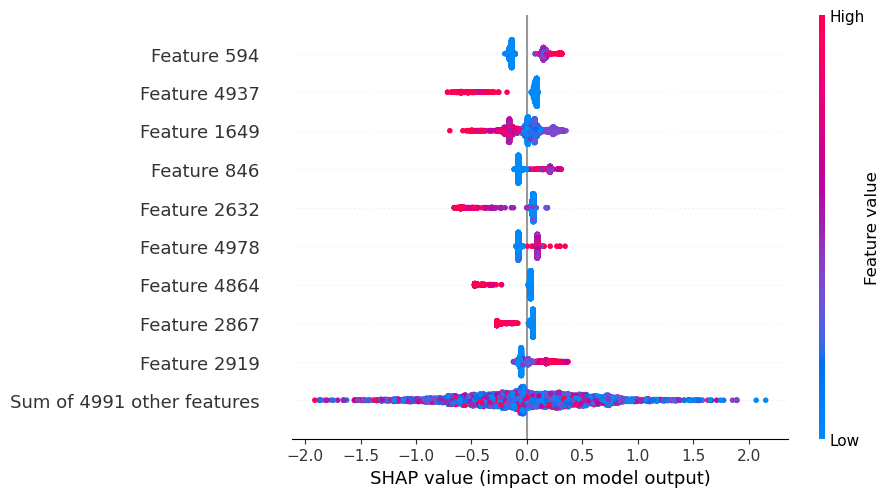

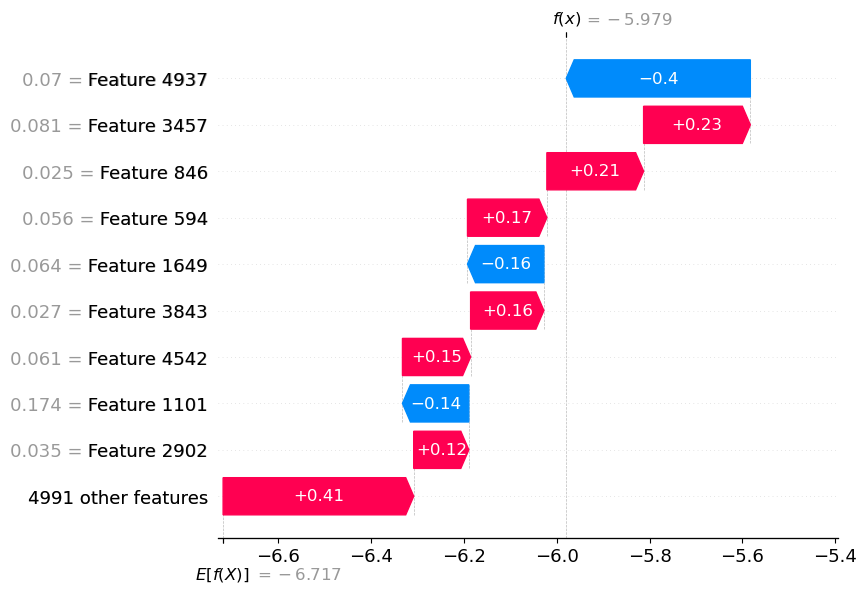

In [28]:
# Convert sparse matrices to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# ✅ SHAP Explanation Setup for XGBoost
import shap

# Initialize the explainer for XGBoost
explainer = shap.Explainer(xgb_model, X_train_dense)

# Get SHAP values for test data
shap_values = explainer(X_test_dense)

# Visualization
shap.plots.beeswarm(shap_values)       # Global feature importance
shap.plots.waterfall(shap_values[0])   # Individual prediction explanation


save preprocessing and model

In [31]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")

# Save the trained model
joblib.dump(xgb_model, "../models/xgb_fake_job_model.pkl")

print("✅ Vectorizer and model saved.")


✅ Vectorizer and model saved.
